In [1]:
# Import the dependecies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats,lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Import dependencies
import requests
from config import weather_api_key

In [7]:
url = 'http://api.openweathermap.org/data/2.5/weather?&APPID=' + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | udachnyy
Processing Record 3 of Set 1 | bolshaya chernigovka
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | sao filipe
Processing Record 7 of Set 1 | yarada
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | paita
Processing Record 11 of Set 1 | chalus
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | najran
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | antofagasta
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | atka
City not found. Skipping...
Proc

In [10]:
len(city_data)

556

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,283.21,46,40,9.26,CL,2021-09-23 19:05:01
1,Udachnyy,66.4167,112.4000,273.87,82,22,2.22,RU,2021-09-23 19:05:03
2,Ushuaia,-54.8000,-68.3000,282.94,58,96,4.58,AR,2021-09-23 19:05:04
3,Rikitea,-23.1203,-134.9692,296.64,73,98,9.79,PF,2021-09-23 19:05:04
4,Sao Filipe,14.8961,-24.4956,299.46,77,46,2.33,CV,2021-09-23 19:05:05
5,Yarada,17.6500,83.2667,300.33,100,75,1.03,IN,2021-09-23 19:05:06
6,Khatanga,71.9667,102.5000,274.00,98,100,2.99,RU,2021-09-23 19:05:07
7,Mataura,-46.1927,168.8643,280.64,76,34,3.24,NZ,2021-09-23 19:05:07
8,Paita,-5.0892,-81.1144,295.57,70,20,6.97,PE,2021-09-23 19:05:08
9,Chalus,36.6550,51.4204,297.27,66,0,0.64,IR,2021-09-23 19:05:08


In [12]:
# Reorder the columns
new_columns = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-09-23 19:05:01,-53.1500,-70.9167,283.21,46,40,9.26
1,Udachnyy,RU,2021-09-23 19:05:03,66.4167,112.4000,273.87,82,22,2.22
2,Ushuaia,AR,2021-09-23 19:05:04,-54.8000,-68.3000,282.94,58,96,4.58
3,Rikitea,PF,2021-09-23 19:05:04,-23.1203,-134.9692,296.64,73,98,9.79
4,Sao Filipe,CV,2021-09-23 19:05:05,14.8961,-24.4956,299.46,77,46,2.33
5,Yarada,IN,2021-09-23 19:05:06,17.6500,83.2667,300.33,100,75,1.03
6,Khatanga,RU,2021-09-23 19:05:07,71.9667,102.5000,274.00,98,100,2.99
7,Mataura,NZ,2021-09-23 19:05:07,-46.1927,168.8643,280.64,76,34,3.24
8,Paita,PE,2021-09-23 19:05:08,-5.0892,-81.1144,295.57,70,20,6.97
9,Chalus,IR,2021-09-23 19:05:08,36.6550,51.4204,297.27,66,0,0.64


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

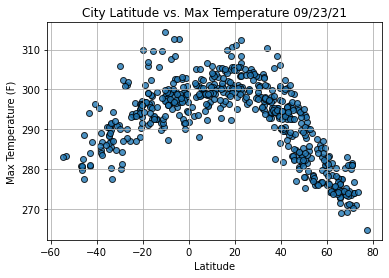

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

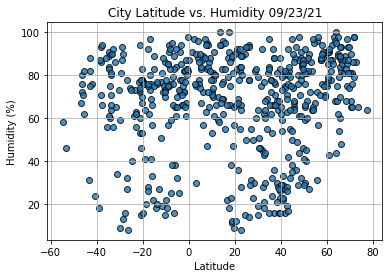

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

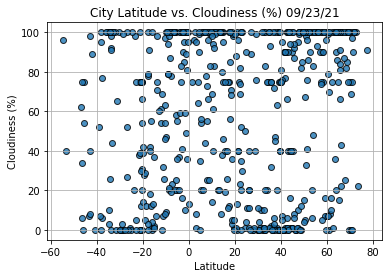

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

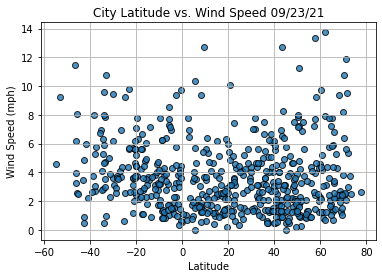

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
index13 = city_data_df.loc[13]
index13

City                  Antofagasta
Country                        CL
Date          2021-09-23 19:05:10
Lat                        -23.65
Lng                         -70.4
Max Temp                   293.27
Humidity                       61
Cloudiness                     20
Wind Speed                   4.41
Name: 13, dtype: object

In [32]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
551     True
552    False
553    False
554     True
555     True
Name: Lat, Length: 556, dtype: bool

In [33]:
city_data_df.loc[city_data_df["Lat"] >= 0].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Udachnyy,RU,2021-09-23 19:05:03,66.4167,112.4000,273.87,82,22,2.22
4,Sao Filipe,CV,2021-09-23 19:05:05,14.8961,-24.4956,299.46,77,46,2.33
5,Yarada,IN,2021-09-23 19:05:06,17.6500,83.2667,300.33,100,75,1.03
6,Khatanga,RU,2021-09-23 19:05:07,71.9667,102.5000,274.00,98,100,2.99
9,Chalus,IR,2021-09-23 19:05:08,36.6550,51.4204,297.27,66,0,0.64


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

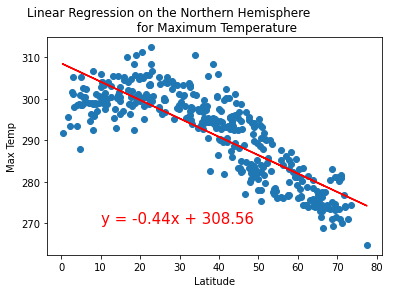

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        \n for Maximum Temperature','Max Temp',(10,270))


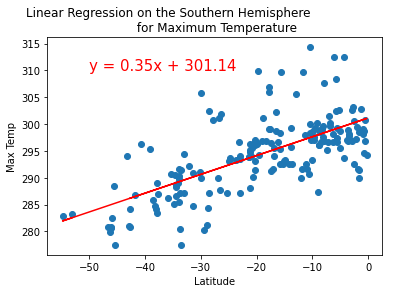

In [56]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere\
                        \n for Maximum Temperature','Max Temp', (-50,310))

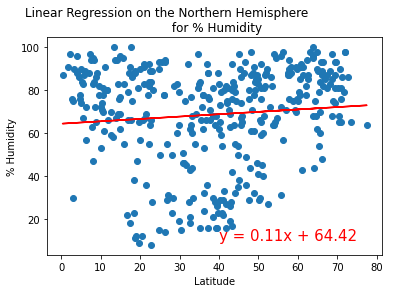

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        \n for % Humidity', '% Humidity',(40,10))

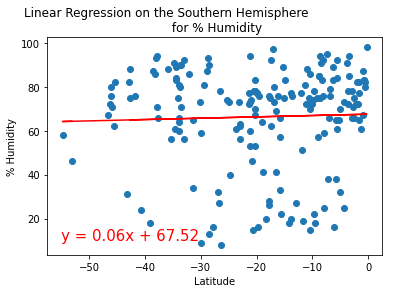

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for % Humidity', '% Humidity',(-55,10))

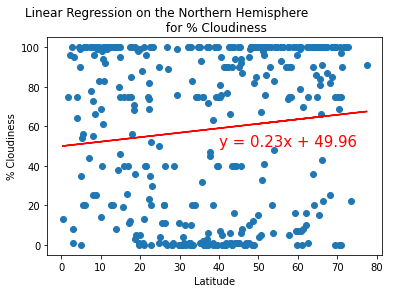

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        \n for % Cloudiness', '% Cloudiness',(40,50))

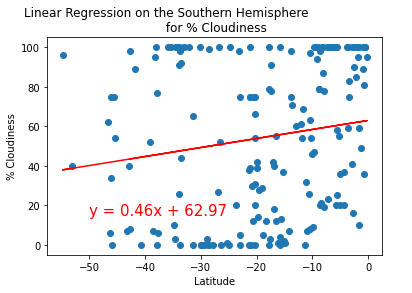

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for % Cloudiness', '% Cloudiness',(-50,15))

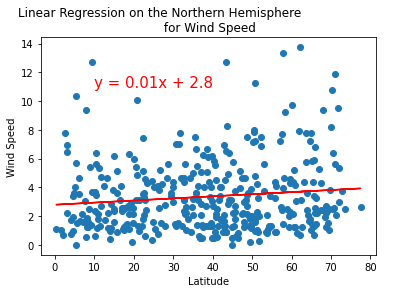

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        \n for Wind Speed', 'Wind Speed',(10,11))

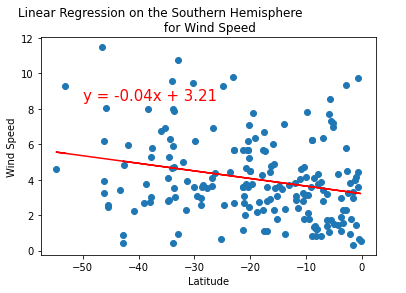

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        \n for Wind Speed', 'Wind Speed',(-50,8.5))